In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_graph import (
  MorseGraph, 
  color_by_position,
  attribute_cost_mat,
)
from mcopt.opt import (
  pGW, pGW_old,
  color_transfer,
)

# Load Morse Complex

In [2]:
mc = load_complex('../gen_data/sinusoidal')
mc_noisy = load_complex('../gen_data/sinusoidal_noisy')

# Construct Morse Graph

In [3]:
mg = MorseGraph.from_complex(mc).sample(3, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).sample(3, mode='geo_dist')

In [4]:
mg_net = mg.to_measure_network()
mg_noisy_net = mg_noisy.to_measure_network()

In [11]:
m = 0.95

partial_coupling, _ = pGW(mg_net, mg_noisy_net, m)

In [12]:
m = 0.95

partial_old_coupling = pGW_old(mg_net, mg_noisy_net, m)

# Generate Color Transfer

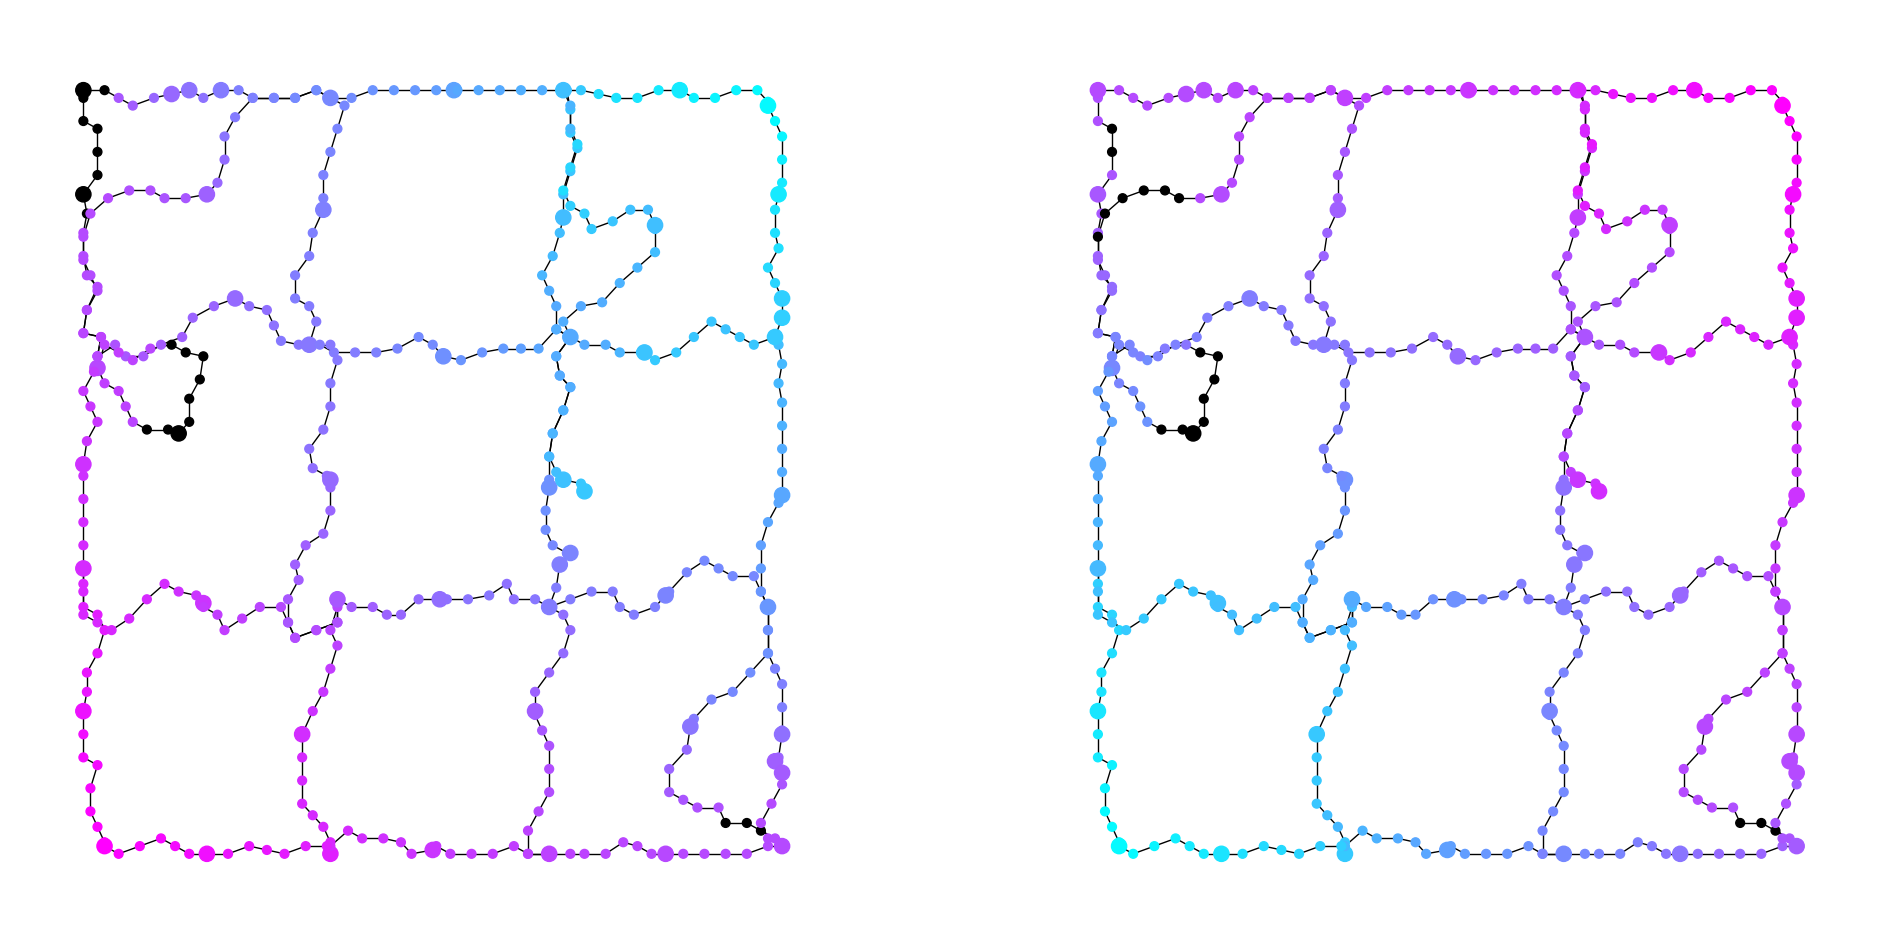

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = mpl.colormaps['cool'].copy()
cmap.set_bad(color='black')

mg_node_color = color_by_position(mg)

partial_mg_noisy_node_color = color_transfer(
  mg_net, 
  mg_noisy_net,
  partial_coupling,
  mg_node_color,
)

partial_old_mg_noisy_node_color = color_transfer(
  mg_net, 
  mg_noisy_net,
  partial_old_coupling,
  mg_node_color,
)

mg_noisy.draw(
  ax=axis[0], 
  node_size=40, 
  node_color=partial_mg_noisy_node_color,
  cmap=cmap
)

mg_noisy.draw(
  ax=axis[1], 
  node_size=40, 
  node_color=partial_old_mg_noisy_node_color,
  cmap=cmap
)

plt.show()